In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df= pd.read_csv("heart.csv", usecols=[3,4,13])

In [25]:
df.sample(3)

,trestbps,chol,target
131,134,271,1
72,130,204,1
241,174,249,0


In [ ]:
# df= df[['trestbps', 'chol']]

<Axes: xlabel='trestbps', ylabel='Density'>

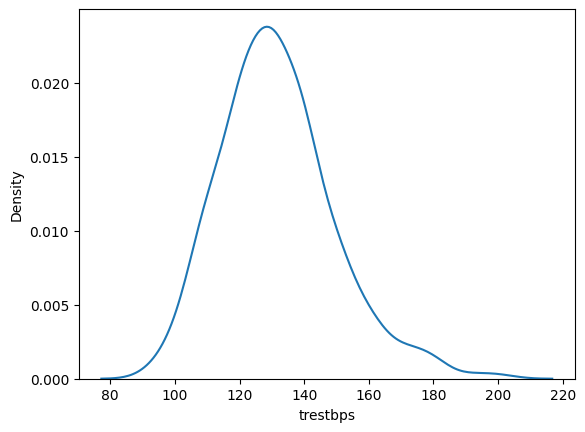

In [10]:
sns.kdeplot(df["trestbps"])

<Axes: xlabel='chol', ylabel='Density'>

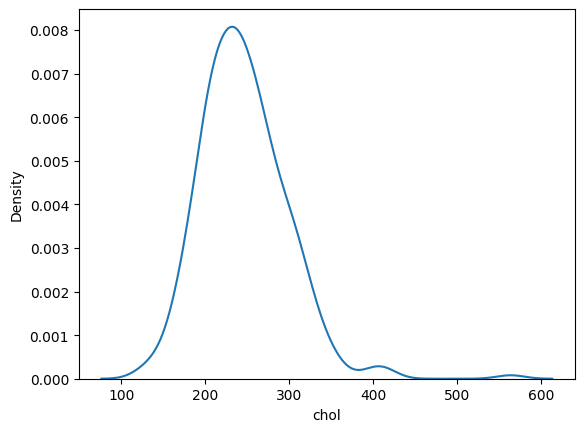

In [11]:
sns.kdeplot(df["chol"])

# Train Test split


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('target', axis=1), df['target'], test_size=0.05, random_state=0)

# Min max Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [43]:
X_train_scaled
X_test_scaled

array([[ 0.52040816,  0.09930716],
       [ 0.7755102 ,  0.22170901],
       [ 0.7755102 ,  0.36258661],
       [ 0.31632653,  0.29330254],
       [ 0.36734694,  0.23094688],
       [ 0.30612245,  0.33025404],
       [ 0.16326531,  0.08314088],
       [ 0.36734694,  0.28406467],
       [ 1.08163265,  0.36258661],
       [ 0.36734694,  0.4595843 ],
       [ 0.57142857, -0.01154734],
       [ 0.36734694,  0.3187067 ],
       [ 0.41836735,  0.28406467],
       [ 0.36734694,  0.31177829],
       [ 0.26530612,  0.20323326],
       [ 0.06122449,  0.21016166]])

In [44]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [46]:
np.round(X_train.describe(), 2)

,trestbps,chol
count,287.00,287.00
mean,131.30,246.59
std,17.03,51.92
min,94.00,131.00
25%,120.00,211.00
50%,130.00,240.00
75%,140.00,275.00
max,192.00,564.00


##### Normalization is a feature scaling method that resizes range of feature values in a scale between 0 to 1

In [47]:
np.round(X_train_scaled.describe(), 2)

,trestbps,chol
count,287.00,287.00
mean,0.38,0.27
std,0.17,0.12
min,0.00,0.00
25%,0.27,0.18
50%,0.37,0.25
75%,0.47,0.33
max,1.00,1.00


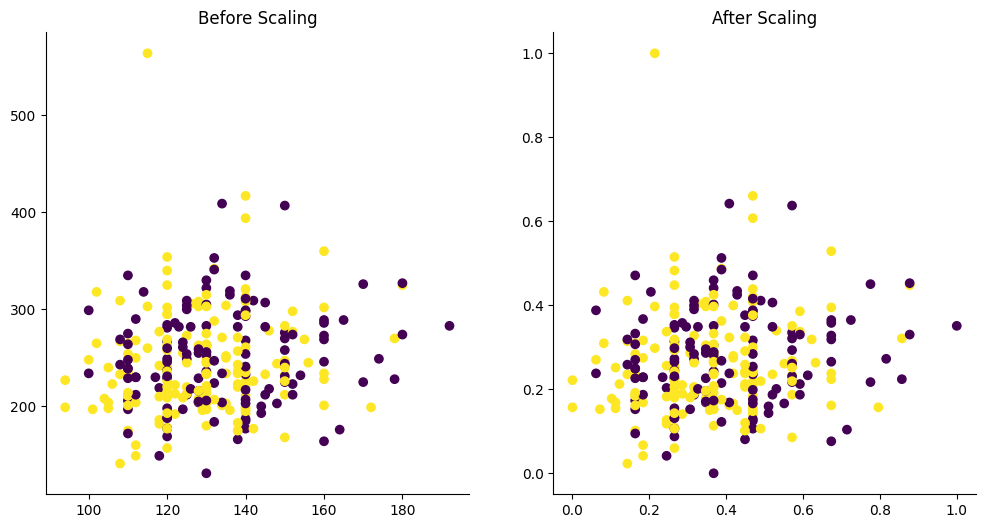

In [63]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,6))
ax1.scatter(X_train['trestbps'], X_train['chol'], c= y_train) 
# colors the points according to the target variable since target column is in y_train. Each unique target value will get a different color.
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['trestbps'], X_train_scaled['chol'], c=y_train)
ax2.set_title("After Scaling")
sns.despine()

<Axes: title={'center': 'After scaling'}, ylabel='Density'>

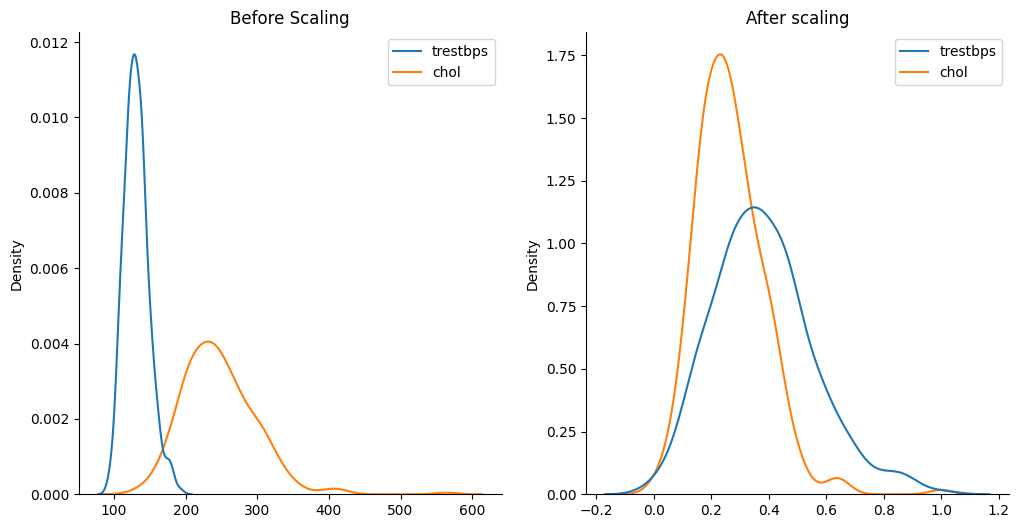

In [74]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,6))
sns.despine()
ax1.set_title("Before Scaling")
x= X_train[['trestbps', 'chol']]
sns.kdeplot(data=x , ax= ax1)
ax2.set_title("After scaling")
x2= X_train_scaled[['trestbps', 'chol']]
sns.kdeplot(data=x2, ax=ax2)